In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

df_raw = pd.read_csv('data/jobs_step_1_final.csv')

drop_cols = [
    'constraints',
    'flags',
    'group',
    'nodes',
    'partition',
    'state-reason',
    'steps-nodes-list',
    'steps-step-job_id',
    'user',

    'steps-time-end',
    'steps-time-start',
]

df = df_raw.drop(columns=drop_cols)

df.head()

,allocation_nodes,priority,required-CPUs,required-memory,steps-time-elapsed,steps-time-system-microseconds,steps-time-total-microseconds,steps-time-user-microseconds,steps-statistics-energy-consumed,steps-tres-requested-average-energy,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
0,1.0,1434.0,24.0,2048.0,11652.0,0.0,2134.0,2134.0,3149556.0,3149556.0,0.0,3149556.0,4468736.0,352.0,352.0,193.0,193.0,24.0,49152.0,1.0
1,1.0,1434.0,24.0,2048.0,13589.0,2146.0,2146.0,0.0,3522726.0,3522726.0,0.0,3522726.0,4468736.0,364.0,364.0,183.0,183.0,24.0,49152.0,1.0
2,1.0,1434.0,24.0,2048.0,10913.0,1410.0,2115.0,705.0,3201576.0,3201576.0,0.0,3201576.0,4468736.0,380.0,380.0,140.0,140.0,24.0,49152.0,1.0
3,1.0,1434.0,24.0,2048.0,11530.0,2148.0,2148.0,0.0,3304818.0,3304818.0,0.0,3304818.0,4468736.0,376.0,376.0,198.0,198.0,24.0,49152.0,1.0
4,1.0,1434.0,24.0,2048.0,11142.0,1061.0,2122.0,1061.0,4501440.0,4501440.0,0.0,4501440.0,4468736.0,468.0,468.0,136.0,136.0,24.0,49152.0,1.0


In [9]:
# Identify outliers in using Isolation Forest

from sklearn.ensemble import IsolationForest

norm_df = (df - df.mean()) / df.std()

energy_columns = [col for col in norm_df.columns if 'energy' in col]
norm_df = norm_df.drop(columns=energy_columns)

iforest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42, n_jobs=4)
iforest.fit(norm_df)

# Get the outlier scores
scores = iforest.decision_function(norm_df)
scores = pd.Series(scores, index=df.index)

# Get the outliers
outliers = df[scores < 0]
print(f'Number of outliers: {len(outliers)}')
outliers.head()

c:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers: 70


,allocation_nodes,priority,required-CPUs,required-memory,steps-time-elapsed,steps-time-system-microseconds,steps-time-total-microseconds,steps-time-user-microseconds,steps-statistics-energy-consumed,steps-tres-requested-average-energy,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
772,4.0,987.0,32.0,102400.0,99936.0,6352.0,8439.0,2087.0,101109648.0,24277232.0,0.0,97108928.0,17874944.0,376.0,188.0,149.0,597.0,32.0,409600.0,4.0
774,4.0,987.0,32.0,102400.0,121943.0,5312.0,8032.0,2720.0,0.0,17785798.0,0.0,71143192.0,17874944.0,352.0,192.0,151.0,606.0,32.0,409600.0,4.0
776,4.0,987.0,32.0,102400.0,121290.0,4981.0,8009.0,3028.0,0.0,18707128.0,0.0,74828512.0,17874944.0,352.0,192.0,151.0,606.0,32.0,409600.0,4.0
777,4.0,987.0,32.0,102400.0,128770.0,7389.0,8041.0,652.0,0.0,21656158.0,0.0,86624632.0,17874944.0,248.0,164.0,139.0,556.0,32.0,409600.0,4.0
778,4.0,987.0,32.0,102400.0,103501.0,6307.0,7947.0,1640.0,0.0,17430957.0,0.0,69723830.0,17874944.0,232.0,184.0,137.0,548.0,32.0,409600.0,4.0


Text(0.5, 1.0, 'Outliers in the dataset (Isolation Forest)')

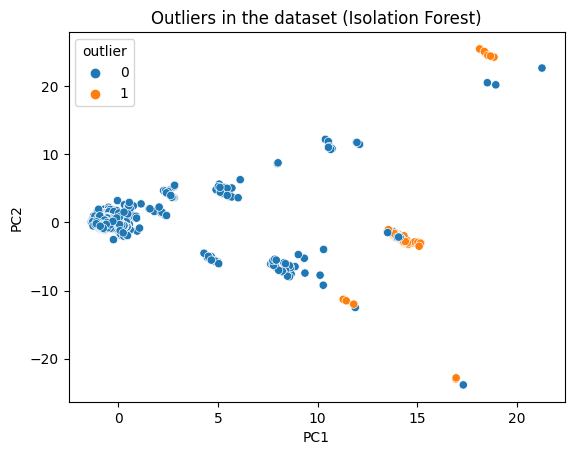

In [10]:
# Perform PCA to visualize the outliers
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=2, n_jobs=-1, kernel='linear', random_state=42)
pca.fit(norm_df)
pca_features = pca.transform(norm_df)

# Print the explained variance ratio
#print(f'Explained variance ratio: {pca.explained_variance_ratio_}, percent: {sum(pca.explained_variance_ratio_):.2f}%')

_Df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
_Df['outlier'] = 0
_Df.loc[outliers.index, 'outlier'] = 1

sns.scatterplot(data=_Df, x='PC1', y='PC2', hue='outlier')
plt.title('Outliers in the dataset (Isolation Forest)')

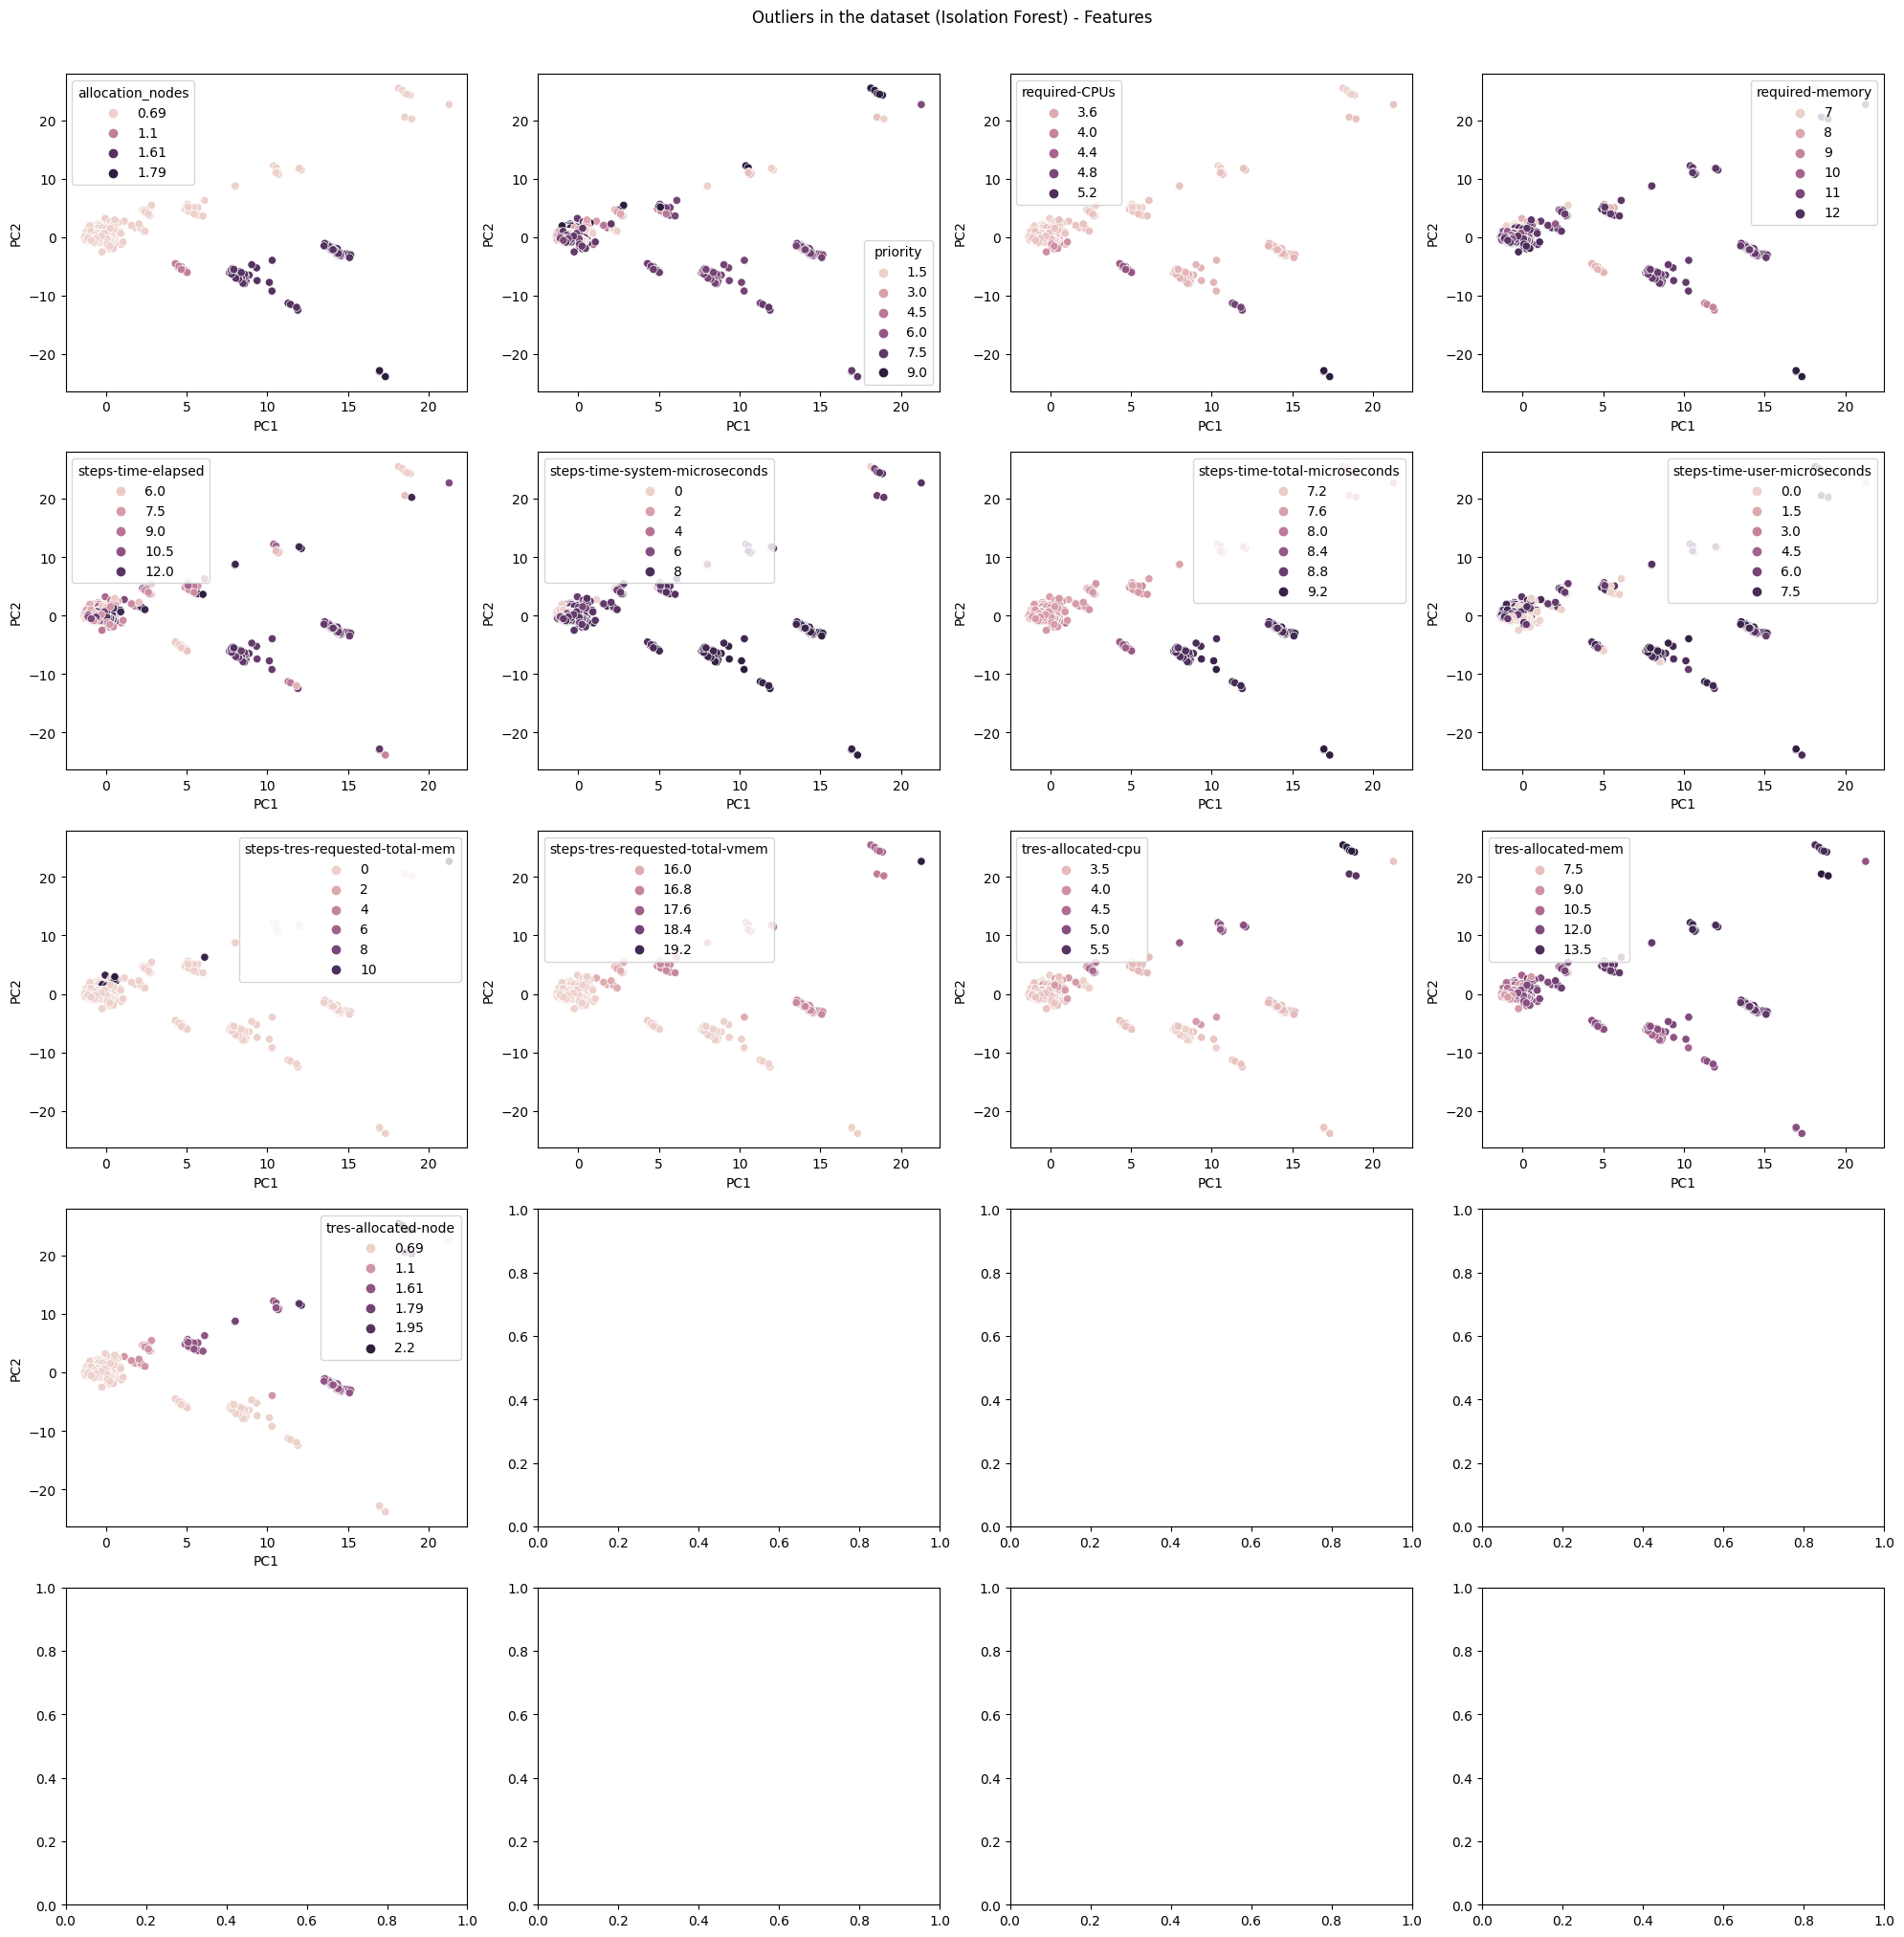

In [11]:
# Plot each feature on PC1 and PC2 as hue to compare the outliers with feature values distribution
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(norm_df.columns):
    tmp_df = _Df.copy()
    tmp_df[col] = np.log(df[col] + 1).round(2)
    sns.scatterplot(data=tmp_df, x='PC1', y='PC2', hue=col, ax=ax[i])


plt.suptitle('Outliers in the dataset (Isolation Forest) - Features', y=1.01)
plt.tight_layout()
plt.show()

In [12]:
# Print characteristics of the outliers
outliers.describe()

,allocation_nodes,priority,required-CPUs,required-memory,steps-time-elapsed,steps-time-system-microseconds,steps-time-total-microseconds,steps-time-user-microseconds,steps-statistics-energy-consumed,steps-tres-requested-average-energy,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,7.000000e+01,70.0,7.000000e+01,7.000000e+01,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3.728571,1763.814286,42.628571,94776.114286,98988.414286,5951.942857,7841.885714,1889.942857,6.266940e+07,1.713982e+07,0.0,6.234141e+07,1.851333e+07,1.227137e+08,204.857143,142.742857,593.928571,66.857143,422780.342857,4.142857
std,0.931283,2154.374520,40.989985,60945.216017,43090.179738,1880.687177,2003.772858,1186.735418,4.156914e+07,1.336601e+07,0.0,2.895934e+07,6.901403e+06,7.207020e+08,84.114188,8.824678,229.151891,106.483487,146069.089515,1.544375
min,1.000000,987.000000,24.000000,1000.000000,322.000000,0.000000,1997.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,4.468736e+06,1.400000e+02,136.000000,103.000000,136.000000,28.000000,122880.000000,1.000000
25%,4.000000,987.000000,32.000000,102400.000000,104286.000000,5032.250000,8120.250000,770.500000,4.404237e+07,1.616074e+07,0.0,6.403093e+07,1.787494e+07,2.440000e+02,180.000000,138.000000,549.750000,32.000000,409600.000000,4.000000
50%,4.000000,987.000000,32.000000,102400.000000,111749.000000,6719.000000,8235.000000,1687.000000,6.812812e+07,1.790466e+07,0.0,7.126892e+07,1.787494e+07,3.460000e+02,184.000000,140.000000,588.000000,32.000000,409600.000000,4.000000
75%,4.000000,987.000000,32.000000,102400.000000,121779.750000,7329.500000,8495.750000,2781.500000,8.042903e+07,2.004981e+07,0.0,7.973068e+07,1.787494e+07,3.670000e+02,192.000000,149.000000,603.000000,32.000000,409600.000000,4.000000
max,5.000000,8153.000000,240.000000,378880.000000,145406.000000,8317.000000,10835.000000,4512.000000,1.765545e+08,1.112776e+08,0.0,1.112776e+08,3.574989e+07,4.294967e+09,524.000000,161.000000,1294.000000,384.000000,786432.000000,8.000000


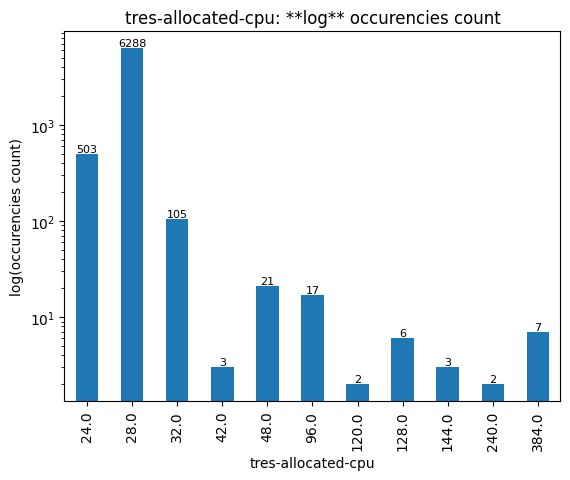

In [13]:
counts = df['tres-allocated-cpu'].value_counts().sort_index()
counts.plot(
    kind='bar', 
    title='tres-allocated-cpu: **log** occurencies count', 
    logy=True, 
    xlabel='tres-allocated-cpu', 
    ylabel='log(occurencies count)'
    )

# Add count on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom', fontsize=8)


# # add only horizontal lines
# for i in range(1, 5):
#     plt.axhline(y=10**i, color='gray', linestyle='-', linewidth=0.5)

In [16]:
outliers_full = df_raw.iloc[outliers.index]
outliers_full

,allocation_nodes,constraints,flags,group,nodes,partition,priority,user,required-CPUs,required-memory,...,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
772,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,"e[1091-1092,1095,1099]",standard,987.0,irekmosaic,32.0,102400.0,...,0.0,97108928.0,17874944.0,376.0,188.0,149.0,597.0,32.0,409600.0,4.0
774,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e[1396-1399],standard,987.0,irekmosaic,32.0,102400.0,...,0.0,71143192.0,17874944.0,352.0,192.0,151.0,606.0,32.0,409600.0,4.0
776,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e[1360-1363],standard,987.0,irekmosaic,32.0,102400.0,...,0.0,74828512.0,17874944.0,352.0,192.0,151.0,606.0,32.0,409600.0,4.0
777,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e[1364-1367],standard,987.0,irekmosaic,32.0,102400.0,...,0.0,86624632.0,17874944.0,248.0,164.0,139.0,556.0,32.0,409600.0,4.0
778,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e[1368-1371],standard,987.0,irekmosaic,32.0,102400.0,...,0.0,69723830.0,17874944.0,232.0,184.0,137.0,548.0,32.0,409600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_BACKFILL'],users,"e[2154,2159,2163-2164]",standard,1578.0,igrbiom2,128.0,8192.0,...,0.0,3132720.0,4468736.0,512.0,512.0,140.0,140.0,28.0,122880.0,1.0
4908,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e[2306-2309],altair,1787.0,igrbiom2,128.0,8192.0,...,0.0,757284.0,4468736.0,504.0,504.0,140.0,140.0,28.0,122880.0,1.0
5903,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,"e[2303,2306-2308]",altair,1665.0,igrbiom2,128.0,8192.0,...,0.0,433116.0,4468736.0,404.0,404.0,136.0,136.0,28.0,122880.0,1.0
6430,5.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],plgrid-users,"e[2090,2095-2096,2098,2101]",standard,1875.0,plgleokingston,240.0,378880.0,...,0.0,111277650.0,4468736.0,444.0,444.0,140.0,140.0,28.0,122880.0,1.0


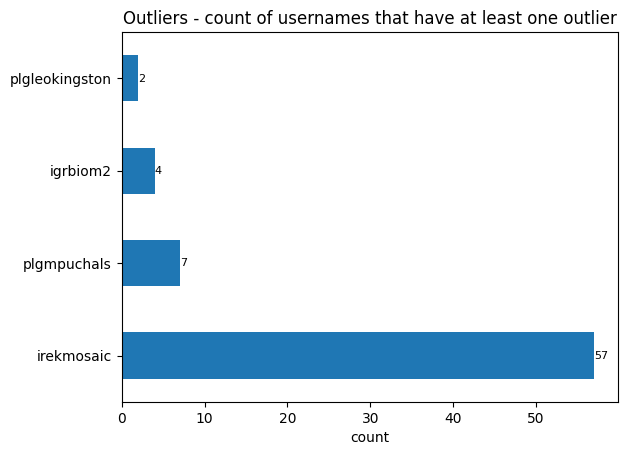

In [29]:
outlier_users = outliers_full['user'].value_counts()
outlier_users.plot(
    # horizontal bar
    kind='barh',
    title='Outliers - count of usernames that have at least one outlier',
    xlabel='count',
)

# Add count at the end of each bar
for i, v in enumerate(outlier_users):
    plt.text(v, i, str(v), color='black', ha='left', va='center', fontsize=8)

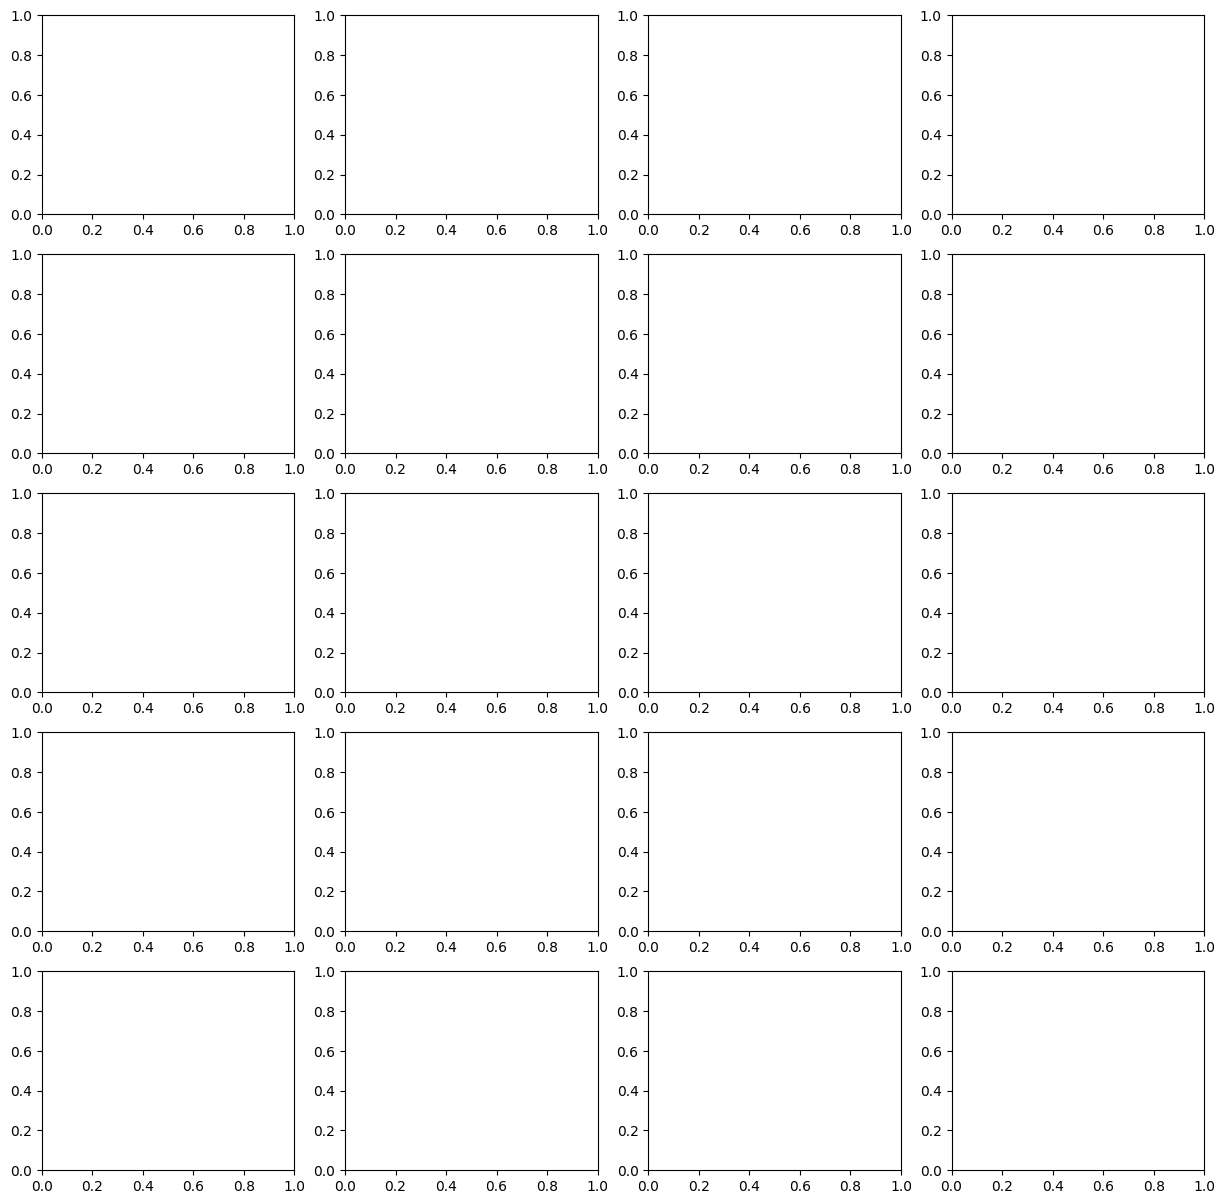

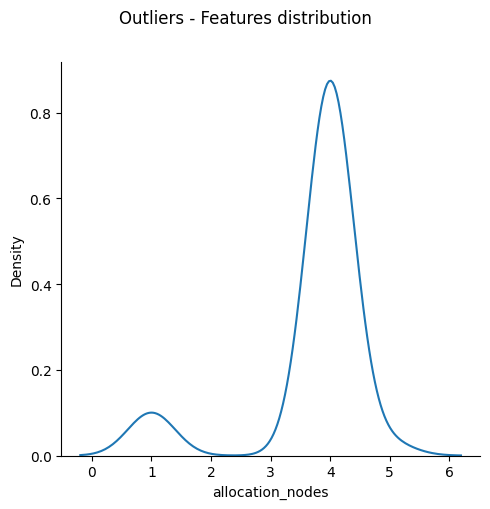

In [41]:
# Plot distribution of each feature for outliers
fig, ax = plt.subplots(5, 4, figsize=(15, 15))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.displot(data=outliers, x=col, kind='kde')
    break


plt.suptitle('Outliers - Features distribution', y=1.01)
plt.tight_layout()

In [36]:
outliers['steps-time-system-microseconds'].max()

8317.0